In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

print("import finish")

import finish


In [5]:
# pandas設定

# データフレームの折り返しを無効化
pd.set_option('display.expand_frame_repr', False) 

print("setting finish")

setting finish


In [6]:
# データセットの取得
california_housing = fetch_california_housing(as_frame=True)

# データフレームの作成
df = california_housing.frame

# データの確認
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23        4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22        3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24        3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25        3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25        3.422


In [7]:
# 特徴量とターゲット変数の分割
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# データの確認
print("X")
print(X.head())
print("")
print("y")
print(y.head())

X
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25

y
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [8]:
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 確認
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(y_test) / len(y))

16512
4128
16512
4128
0.2


In [9]:
# モデルの作成
model = LinearRegression()
print(model)

LinearRegression()


In [10]:
# モデルのトレーニング
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [11]:
# 予測の実行
y_pred = model.predict(X_test)

print(y_pred)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [12]:
# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 0.5332001304956558
MSE: 0.555891598695244
RMSE: 0.7455813830127761


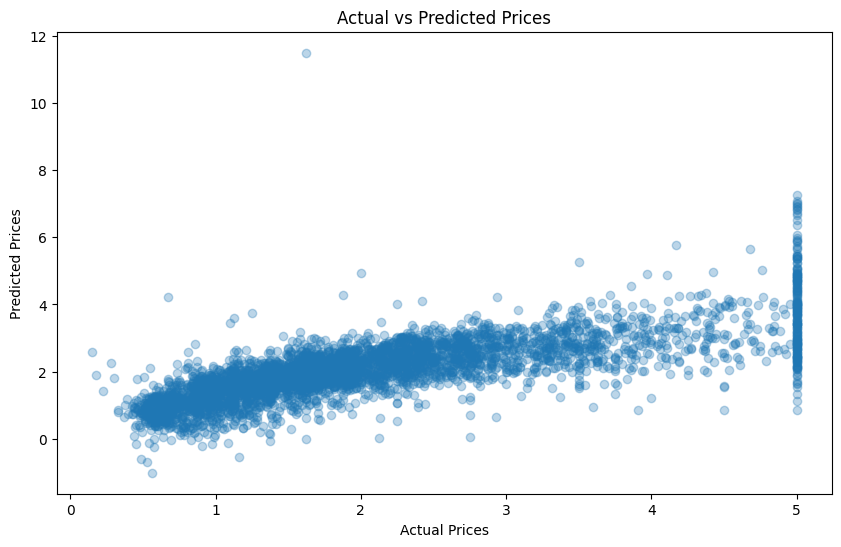

In [13]:
# 結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [14]:
# モデルの性能評価
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train R^2 score: {train_score}')
print(f'Test R^2 score: {test_score}')

Train R^2 score: 0.6125511913966952
Test R^2 score: 0.5757877060324511


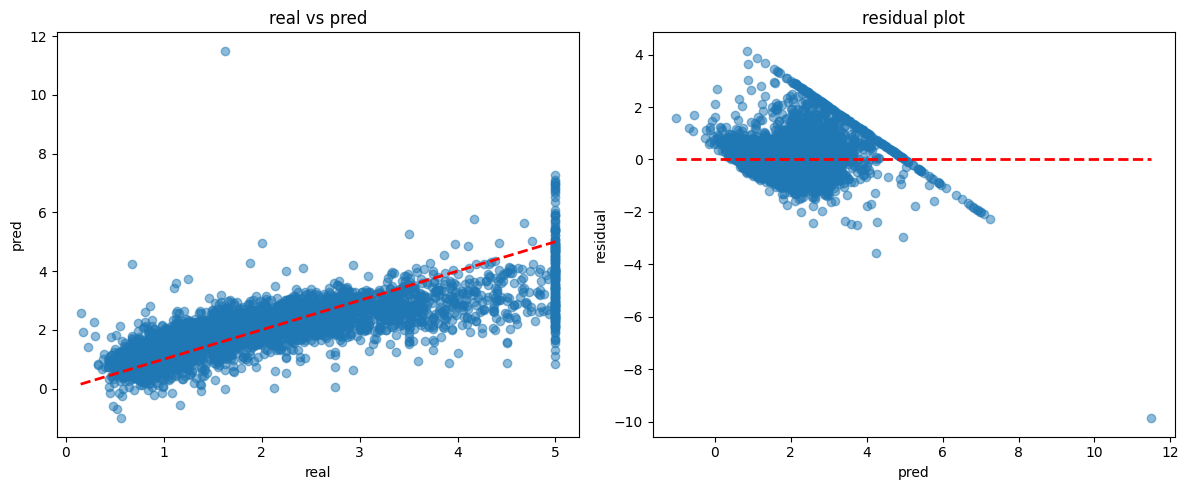

In [19]:
# グラフの作成
plt.figure(figsize=(12, 5))

# 実際の値と予測値の散布図
plt.subplot(121)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('real')
plt.ylabel('pred')
plt.title('real vs pred')

# 残差プロット
plt.subplot(122)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'r--', lw=2)
plt.xlabel('pred')
plt.ylabel('residual')
plt.title('residual plot')

plt.tight_layout()
plt.show()

In [20]:
len(df)

20640